<a href="https://colab.research.google.com/github/quocthai9120/Images-Classification/blob/master/Prototype%20-%20Analyze%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import keras
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

In [10]:
pwd

'/content/drive/My Drive/Colab Notebooks/cifar_10'

In [11]:
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/cifar_10/Models/prototype')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
x_train = np.load('Models/x_train.npy')
x_val = np.load('Models/x_val.npy')
y_train = np.load('Models/y_train.npy')
y_val = np.load('Models/y_val.npy')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 128)         0         
__________

In [14]:
dict([(layer.name, layer) for layer in model.layers[0:]])

{'activation_1': <keras.layers.core.Activation at 0x7f00f60ef128>,
 'activation_2': <keras.layers.core.Activation at 0x7f00f57e34a8>,
 'activation_3': <keras.layers.core.Activation at 0x7f00f57f39b0>,
 'activation_4': <keras.layers.core.Activation at 0x7f00f57a5c88>,
 'activation_5': <keras.layers.core.Activation at 0x7f00f60ef2e8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f00f600dc88>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f00f57c15f8>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f00f57e3048>,
 'dense_1': <keras.layers.core.Dense at 0x7f00f5790eb8>,
 'dense_2': <keras.layers.core.Dense at 0x7f00f57a5c50>,
 'dropout_1': <keras.layers.core.Dropout at 0x7f00f57a5b70>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f00f5790f60>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7f00f60ef198>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7f00f57f3a58>}

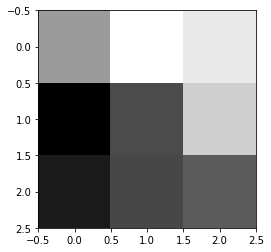

In [16]:
plt.imshow(model.layers[5].get_weights()[0][:,:,1,:][:,:,1], cmap='gray')

In [0]:
filters = model.layers[5].get_weights()[0][:,:,:,:][:,:,:]

In [0]:
def visualize_filters(filters, row, col, channel=0, figsize=(5,5)):
    fig, axes = plt.subplots(row, col, figsize=figsize)
    index = 0
    
    for i in range(row):
        for j in range(col):
            # filters[row, col, channel,filters index][rowm,col,filter index]
            axes[i, j].imshow(filters[:,:,channel,:][:,:,index], cmap='gray')
            index += 1
    
    plt.show()

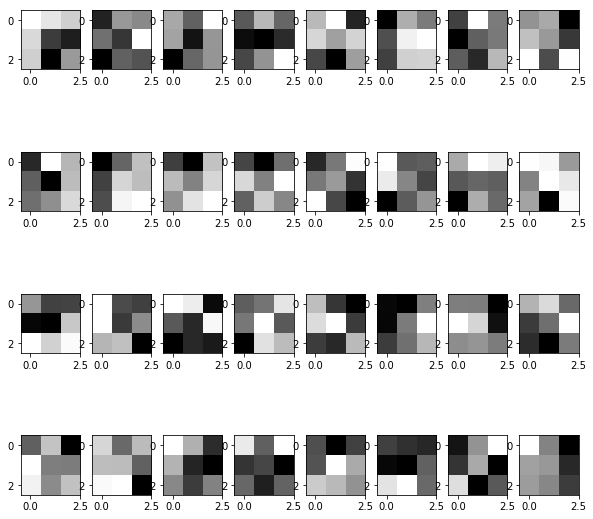

In [19]:
visualize_filters(filters,4,8,channel=0,figsize=(10,10))

In [0]:
def visualize_activations(image_index, layer=0, row=4, col=8):
    activations = Model(inputs=model.input, outputs=model.layers[layer].output)
    fig, axes = plt.subplots(row, col, figsize=(10,10))

    index = 0
    for i in range(row):
        for j in range(col):
            image = activations.predict(x_val[image_index:image_index+1])[0,:,:,index]
            axes[i][j].imshow(image, cmap='gray')
            index += 1
    plt.show()

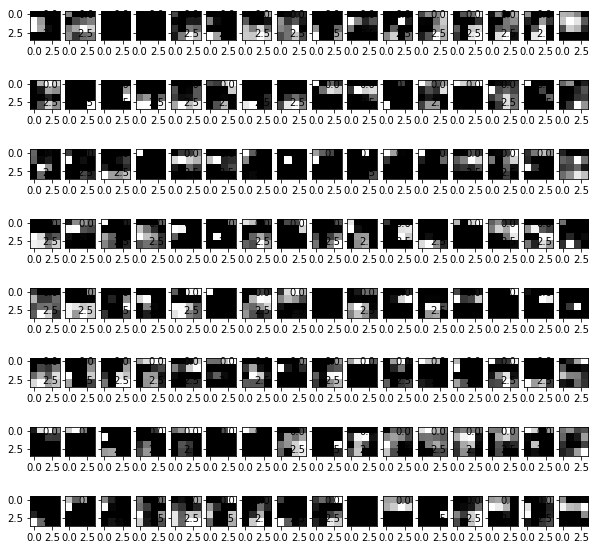

In [21]:
visualize_activations(image_index=1, layer=7, row=8, col=16)

In [0]:
def visualize_images(data, labels, predict, start=0, cols=4, rows=4, size=10, fontsize=10):
    fig = plt.figure(figsize=(size, size))
    plt.subplots_adjust(bottom=.05, top=.95, hspace=.9)
    
    cols = cols
    rows = rows
    for i in range(1, cols * rows + 1):
        img = data[start - 1 + i]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        
        pred = label_names[predict[start - 1+ i]]
        real = label_names[int(np.where(labels[start - 1 + i] == 1)[0])]
        plt.title('Predict: ' + pred + '\n Real Label: ' + real, fontsize=fontsize)
    plt.show()

In [0]:
y_pred = model.predict_classes(x_val)

In [0]:
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    ]

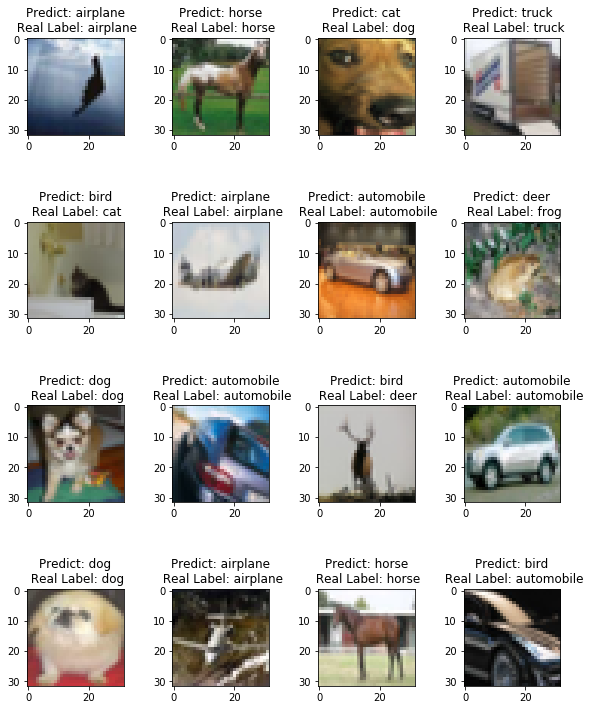

In [25]:
visualize_images(x_val, y_val, y_pred, start=0, fontsize=12)